# Lab 1: Comparison of the Tensile Properties of the Collateral Ligaments

## Data Analysis

Goals for this lab report:

- **Hypotheses:** What is the effect of the test variable (MCL vs LCL) on
  - Stiffness, $k$
  - Tangent Elastic Modulus, $E$
- Present $\text{mean}\pm\text{std. dev.}$ and perform statistical tests for:
  - Geometric Dimensions: $L_0$, $w$, $t$
  - Cross-sectional area, $A$
  - Stiffness, $k$ (T-Test)
  - Tangend Elastic Modulus, $E$ (T-Test)

In [1]:
# Google Colab: Run this to mount your Google Drive

# from google.colab import drive
# import os
# drive.mount('/content/gdrive', force_remount=True)
# os.chdir('/content/gdrive/MyDrive/BMES 301/Lab 1')

In [2]:
# Notebook setup

%load_ext autoreload
%autoreload 2

## Import necessary libraries
from pathlib import Path
from scipy import stats
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import pandas as pd
import numpy as np
import tools
import re
import os

## Define the paths to raw data and results
datapath = Path('data')

In [3]:
# Load data

## Regular expression to pull sample and team information from file name
meta = re.compile(r"(?P<tissue>[ml]cl)(?P<team>\d{2})")

## Load all data into a list
data = []
for file in datapath.glob("lab1*.csv"):

    ## Extract sample and team information from file name
    match = meta.search(file.name)

    ## Load data
    try:
        _df = tools.load_data(file)
        _df['tissue'] = match.group('tissue').upper()
        _df['team'] = match.group('team')
        data.append(_df)
    except AssertionError as e:
        print(f"Error loading {file.name}: {e}")

## Concatenate all data into a single dataframe
data = pd.concat(data).reset_index(drop=True)
display(data.head())

## Load specimen dimensions
specimen = pd.read_excel(datapath / 'lab1_specimen_dimensions.xlsx')

,time,disp,load,tissue,team
0,0.0000,-2.000079,-0.08,LCL,01
1,0.1464,-1.998455,-0.08,LCL,01
2,0.2928,-1.995375,-0.08,LCL,01
3,0.4392,-1.984185,-0.08,LCL,01
4,0.5856,-1.970243,-0.08,LCL,01


## Raw Data Visualization

**Preconditioning:** $t > 120s$

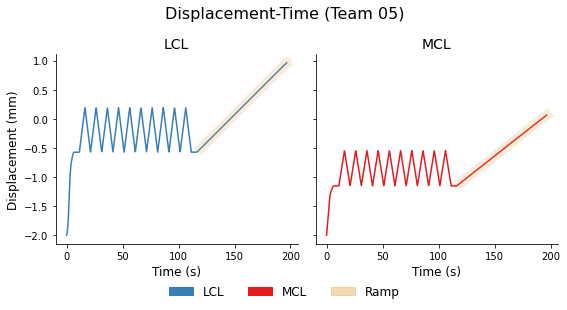

In [4]:
# Disp vs Time
fig, ax = tools.plot_data(
    data = data.copy(),
    xvar='time',
    yvar='disp',
    xlab='Time (s)',
    ylab='Displacement (mm)',
    title='Displacement-Time (Team 05)',
    highlight_ramp=True,
    ramp_time=120
)

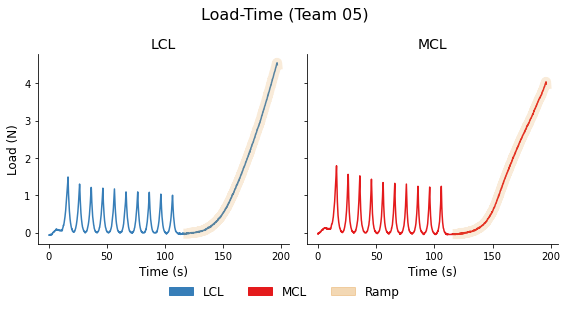

In [5]:
# Load vs Time
fig, ax = tools.plot_data(
    data = data.copy(),
    xvar='time',
    yvar='load',
    xlab='Time (s)',
    ylab='Load (N)',
    title='Load-Time (Team 05)',
    highlight_ramp=True,
    ramp_time=120
)

## Visualization: Stress & Strain

$$ \text{Stress, } \sigma = \frac{F}{w \cdot t} $$

$$ \text{Strain, } \varepsilon = \frac{\Delta L}{L_0} $$

Figures from this point only include the 'ramp' data.

In [6]:
data.head()

,time,disp,load,tissue,team
0,0.0000,-2.000079,-0.08,LCL,01
1,0.1464,-1.998455,-0.08,LCL,01
2,0.2928,-1.995375,-0.08,LCL,01
3,0.4392,-1.984185,-0.08,LCL,01
4,0.5856,-1.970243,-0.08,LCL,01


In [7]:
specimen.head()

,Group #,Section,Ligament,Gauge length (mm),Width (mm),Thickness (mm),Notes
0,1,Wednesday,LCL,14.1,4.2,1.2,NaN
1,1,Wednesday,MCL,11.5,6.5,0.7,NaN
2,2,Wednesday,LCL,9.7,3.8,0.7,NaN
3,2,Wednesday,MCL,16.4,6.7,1.3,NaN
4,3,Wednesday,LCL,16.0,5.4,1.1,NaN


In [8]:
# Exclude preconditioning data and shift displacement to start at 0
data = data.loc[data['time'] > 120].copy()

# Shift displacement and time to start at 0 (Done separately for each team)
for team in data['team'].unique():
    I = data['team'] == team
    data.loc[I, 'disp'] = (data.loc[I]
        .groupby('tissue')['disp']
        .apply(lambda x: x - x.iloc[0]))
    data.loc[I, 'time'] = (data.loc[I]
        .groupby('tissue')['time']
        .apply(lambda x: x - x.iloc[0]))

In [9]:
# Compute stress and strain
for team in data['team'].unique():
    for tissue in ['MCL', 'LCL']:
        I = (data['team'] == team) & (data['tissue'] == tissue)
        J = (specimen['Group #'] == int(team)) & (specimen['Ligament'] == tissue)

        # Stress
        A = (specimen.loc[J, 'Width (mm)'] * specimen.loc[J, 'Thickness (mm)']).values[0]
        data.loc[I, 'stress'] = data.loc[I, 'load'] / A

        # Strain
        L0 = specimen.loc[J, 'Gauge length (mm)'].values[0]
        data.loc[I, 'strain'] = data.loc[I, 'disp'] / L0

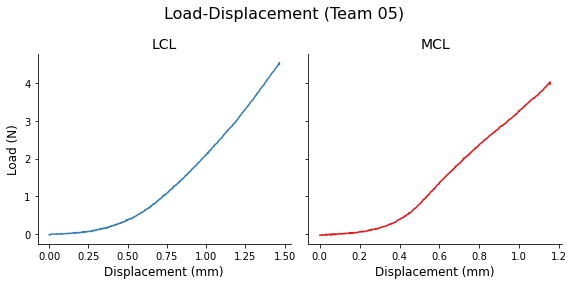

In [10]:
# Load vs Displacement
fig, ax = tools.plot_data(
    data = data.copy(),
    xvar='disp',
    yvar='load',
    xlab='Displacement (mm)',
    ylab='Load (N)',
    title='Load-Displacement (Team 05)',
    highlight_ramp=False
)

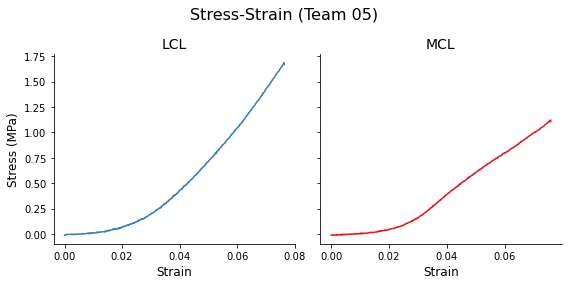

In [11]:
# Stress vs Strain
fig, ax = tools.plot_data(
    data = data.copy(),
    xvar='strain',
    yvar='stress',
    xlab='Strain',
    ylab='Stress (MPa)',
    title='Stress-Strain (Team 05)',
    highlight_ramp=False
)

## Curve Fitting: Estimate $E$ and $k$


$$ \sigma = E \cdot \varepsilon $$
$$ F = k\cdot \Delta L $$
$$ k = \frac{E \cdot A}{L_0} $$

In [12]:
import statsmodels.formula.api as smf

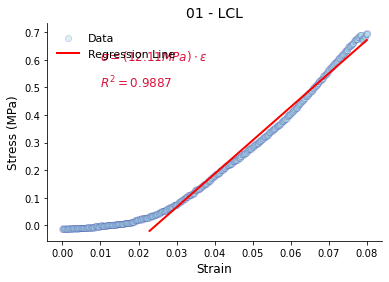

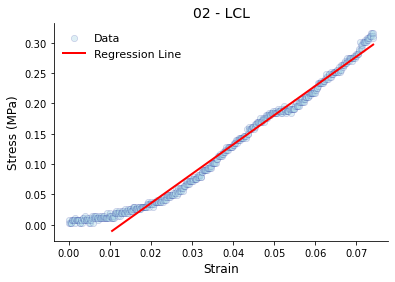

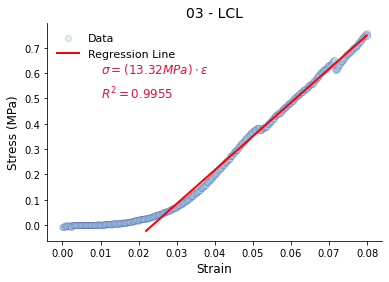

R^2 didn't converge after 30% of the data was removed


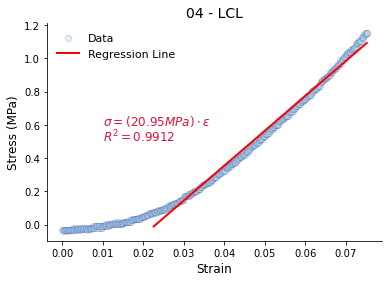

R^2 didn't converge after 30% of the data was removed


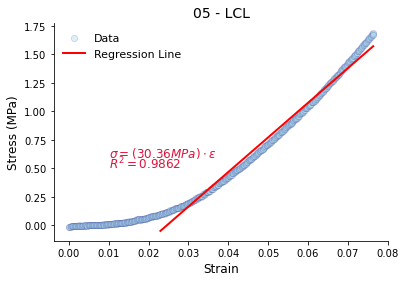

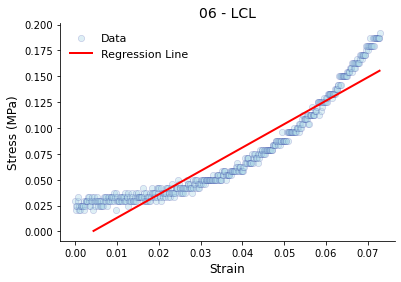

R^2 didn't converge after 30% of the data was removed


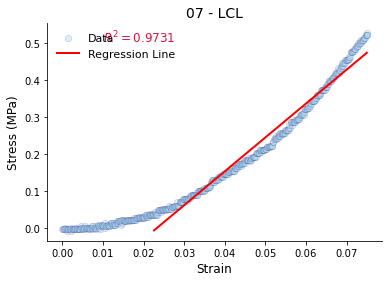

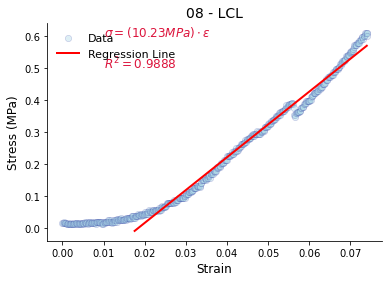

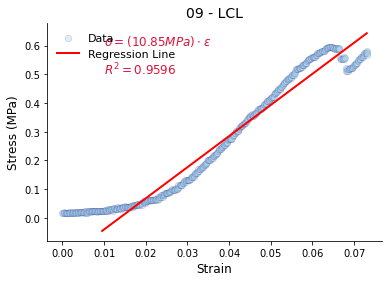

R^2 didn't converge after 30% of the data was removed


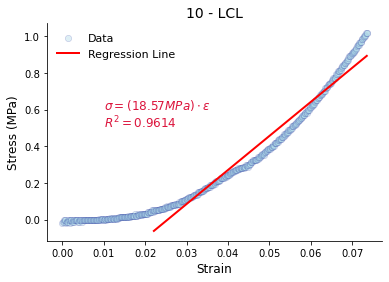

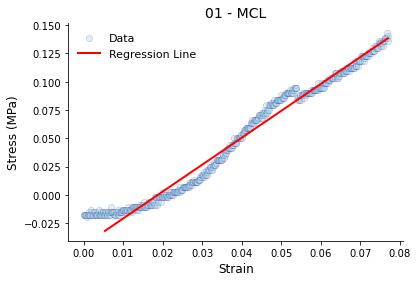

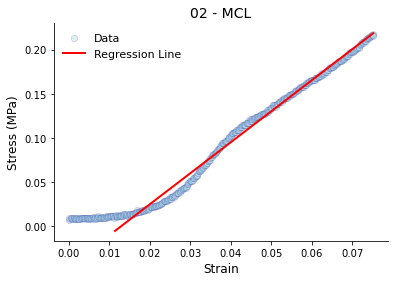

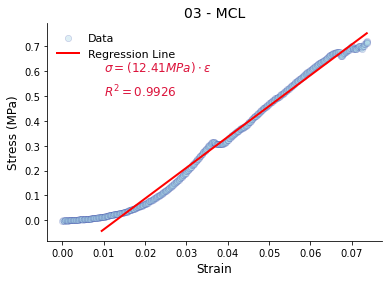

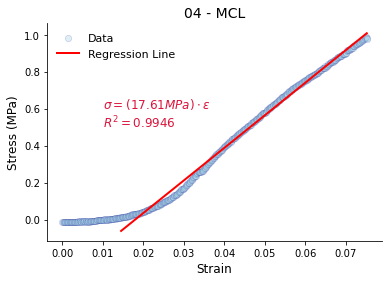

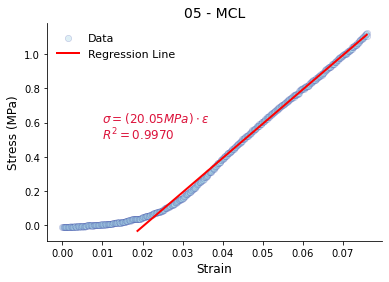

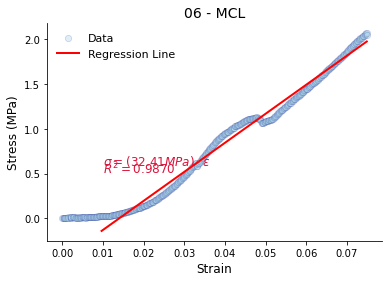

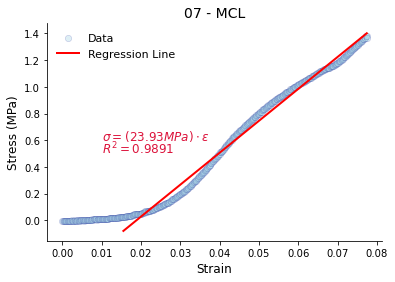

R^2 didn't converge after 30% of the data was removed


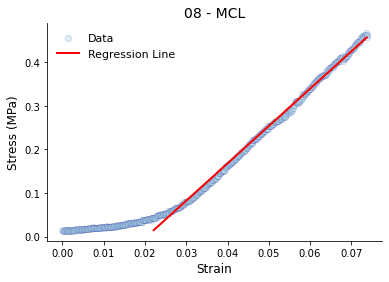

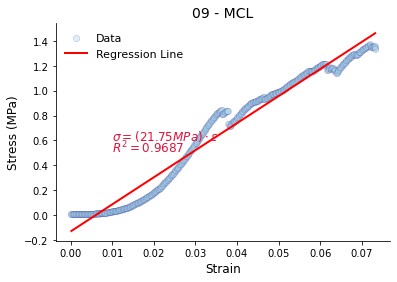

R^2 didn't converge after 30% of the data was removed


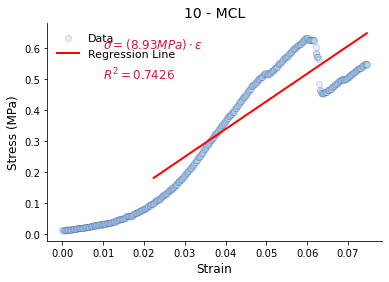

In [14]:
for tissue in ['LCL', 'MCL']:
    for team in data['team'].unique():
        # Subset data
        I = (data['team'] == team) & (data['tissue'] == tissue)
        _data = data.loc[I].copy()

        # Find linear region
        i, _ = tools.get_linear_region(_data)

        # Fit linear model
        mdl = smf.ols('stress ~ strain', data=_data[i:]).fit()
        
        # Plot
        fig, ax = tools.plot_regression(_data, mdl, i, f'{team} - {tissue}')
        plt.show()        

In [134]:
regr.coef_

array([[16.44469665]])

In [22]:
# Select linear region
I = df['Elapsed Time (s)'] > 120
fig = px.scatter(df[I], x='Displacement (mm)', y='Force (N)')
fig.update_layout(width=700, height=350)

In [23]:
# For analysis, show 
force = df.loc[I, 'Force (N)']
displacement = df.loc[I, 'Displacement (mm)']  # Is this the right value for Delta L
res = stats.linregress(displacement, force)

print(f"Slope: {res.slope:.4f} +/- {res.stderr:.4f}")

Slope: 5.8759 +/- 0.0637


In [24]:
%load_ext rpy2.ipython

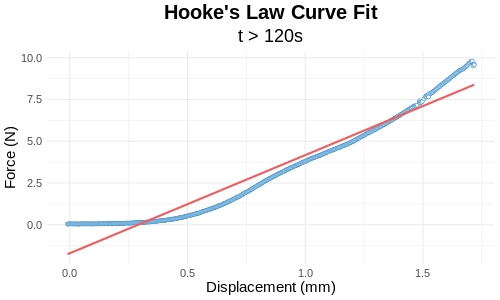

In [82]:
%%R -i df -w 500 -h 300
require(tidyverse)


df %>%
    filter(`Elapsed Time (s)` > 120) %>%
    ggplot(aes(x=`Displacement (mm)`, y=`Force (N)`)) +
        geom_point(color='#4c98cf', fill='white', shape=21) +
        geom_smooth(method='lm', formula='y~x', se=FALSE, color='#f05d5d', 
                    linewidth=4) +
        theme_minimal() +
        labs(title="Hooke's Law Curve Fit", subtitle='t > 120s') +
        theme(
            plot.title=element_text(hjust=0.5, size=20, face='bold'),
            plot.subtitle=element_text(hjust=0.5, size=18),
            axis.title=element_text(size=15),
            axis.text=element_text(size=11)
        )